### Introduction to 3d Point Cloud Analysis using Open3D

##### Source: MCI Academy Course on 3D Computer Vision 

##### Instructor: Professor Shohreh Kasaei

### Import Library

In [1]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


### Basic Functions

#### Read Point Clouds using io module

In [3]:
# read point cloud
path = "/home/setare/Vision/Work/3D-Vision/PointCloud Analysis/Datasets/ModelNet10/ModelNet10/monitor/train/monitor_0001.off"

# read the point cloud file using io module
## for .off file
pc = o3d.io.read_triangle_mesh(path)

## for .ply use:
### pc = o3d.io.read_point_cloud(path)

#### Show Point Clouds using Visualization module

In [4]:
# show point clouds in the interactive window
o3d.visualization.draw_geometries([pc])

#### Interactive Window
You will see the window below:

![open3d interactive window](Images/open3d-window.png)

#### Methods

In [5]:
# you can check the number of points using:
## pc.points

# but for triangle mesh (existing dataset):
pc.vertices

std::vector<Eigen::Vector3d> with 798 elements.
Use numpy.asarray() to access data.

#### pc.vertices summary:
pc.vertices gives you the list of all mesh vertices (3D points).

If you want to work with them numerically, use np.asarray(pc.vertices).

In [6]:
# accessing the data
np.asarray(pc.vertices)

array([[-2.46184993e+00,  1.28761005e+00, -9.02165031e+00],
       [-2.66936994e+00,  3.83700011e-03, -9.02165031e+00],
       [-2.67569995e+00,  4.40591007e-01, -9.02165031e+00],
       ...,
       [ 1.14694998e-01,  9.74921036e+00, -4.46771002e+00],
       [ 1.14694998e-01,  9.74921036e+00,  8.73145008e+00],
       [ 1.14694998e-01, -9.74915981e+00, -4.46771002e+00]])

#### Load Built-in Dataset

In [7]:
dataset = o3d.data.LivingRoomPointClouds()

for pcd_path in dataset.paths:
    pc = o3d.io.read_point_cloud(pcd_path)
    break

In [8]:
# show point clouds in the interactive window
o3d.visualization.draw_geometries([pc])

#### Interactive Window
You will see the window below:

![open3d interactive window](Images/living-room.png)

#### Check Methods

In [9]:
# check number of points
pc.points

std::vector<Eigen::Vector3d> with 196133 elements.
Use numpy.asarray() to access data.

In [10]:
np.asarray(pc.points)

array([[0.65234375, 0.84686458, 2.37890625],
       [0.65234375, 0.83984375, 2.38430572],
       [0.66737998, 0.83984375, 2.37890625],
       ...,
       [2.00839925, 2.39453125, 1.88671875],
       [2.00390625, 2.39488506, 1.88671875],
       [2.00390625, 2.39453125, 1.88793314]])

In [11]:
# check the colors in normal format
pc.colors

std::vector<Eigen::Vector3d> with 196133 elements.
Use numpy.asarray() to access data.

In [12]:
np.asarray(pc.colors)

array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       ...,
       [0.92941176, 0.89019608, 0.87058824],
       [0.87843137, 0.81960784, 0.79215686],
       [0.87843137, 0.81960784, 0.79215686]])

### Create Point Cloud from RGBD images

In [13]:
# load dataset
redwood_rgbd = o3d.data.SampleRedwoodRGBDImages()

# read images using open3d
color_raw = o3d.io.read_image(redwood_rgbd.color_paths[0])
depth_raw = o3d.io.read_image(redwood_rgbd.depth_paths[0])

# create RGBD image
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(color_raw, depth_raw)

In [18]:
rgbd_image

RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.

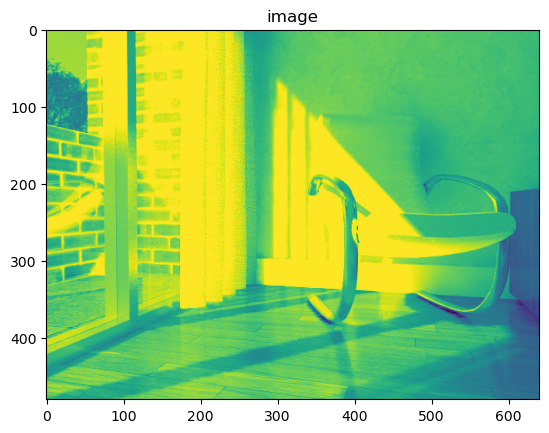

In [16]:
# show images using matplotlib
plt.title('image')
plt.imshow(rgbd_image.color)
plt.show()

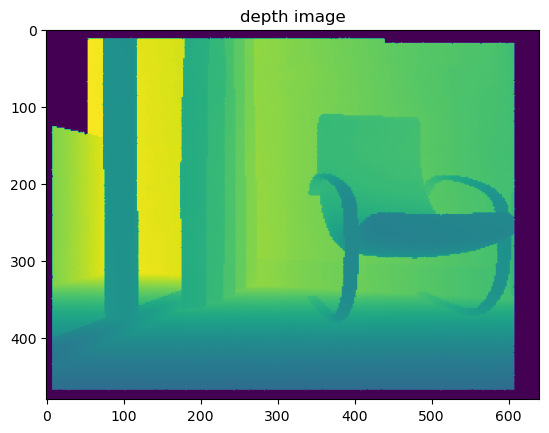

In [17]:
# show depth image
plt.title('depth image')
plt.imshow(rgbd_image.depth)
plt.show()

In [29]:
# create point cloud 
## for this propose we need camera parameters but we can use default parameters.
pc = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image, 
                                                   o3d.camera.PinholeCameraIntrinsic(o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))

# Then draw point cloud
o3d.visualization.draw_geometries([pc])

#### Interactive Window
You will see the window below:

![open3d interactive window](Images/createdPCs.png)

#### More information:
For more information and creating pointclouds from rgbd images check [this](https://www.open3d.org/docs/release/tutorial/geometry/rgbd_image.html)!

### Save/load Point Clouds to/from txt file

In [30]:
# Extract point and color data
points = np.asarray(pc.points)                     # (N, 3)
colors = np.asarray(pc.colors)                     # (N, 3)

# Concatenate points and colors
data = np.hstack((points, colors))  # (N, 6)

# Save to txt
np.savetxt("point_cloud_rgb.txt", data, fmt="%.6f %.6f %.6f %d %d %d", delimiter=' ')

In [31]:
# then load it as numpy array
data = np.loadtxt("point_cloud_rgb.txt")

data.shape

(267129, 6)

In [32]:
# create empty pc
pc = o3d.geometry.PointCloud()

# add points
pc.points = o3d.utility.Vector3dVector(data[:,:3])
o3d.visualization.draw_geometries([pc])

In [34]:
# then add colors
pc.colors = o3d.utility.Vector3dVector(data[:,3:])
o3d.visualization.draw_geometries([pc])

### Color Point Cloud

In [36]:
pc.paint_uniform_color([0.5, 0.2, 0.9])
o3d.visualization.draw_geometries([pc])

### Save Point Clouds in .ply format

In [38]:
o3d.io.write_point_cloud("output.ply", pc, write_ascii=True)

True

### Check Open3D Documentations for more information.

You can check Open3D official documentations [Here](https://www.open3d.org/docs/release/index.html)!